In [1]:
import scipy.fft
import sol2 as sol
import numpy as np
from typing import Callable
from scipy.io import wavfile
import IPython
from sol1 import read_image, display

In [2]:
## Test 1.1 - 1D DFT

# Generate random vectors and check DFT on it
for i in range(100):
    x = np.random.rand(i + 1)
    error = np.linalg.norm(scipy.fft.fft(x) - sol.DFT(x))
    assert error < 1e-10, f"DFT returns far results for {x}"
    
# Generate random vectors and check IDFT on it
for i in range(100):
    x = np.random.rand(i + 1) + np.random.rand(i + 1) * 1j
    error = np.linalg.norm(scipy.fft.ifft(x) - sol.IDFT(x))
    assert error < 1e-10, f"IDFT returns far results for {x}"

In [3]:
## Test 1.2 - 2D DFT

# Generate random matrices and check DFT on it
for i in range(50, 60):
    for j in range(50, 60):
        x = np.random.rand(i + 1, j + 1)
        error = np.linalg.norm(scipy.fft.fft2(x) - sol.DFT2(x))
        assert error < 1e-10, f"DFT2 returns far results for {x}"

# Generate random matrices and check IDFT on it
for i in range(50, 60):
    for j in range(50, 60):
        x = np.random.rand(i + 1, j + 1) + (np.random.rand(i + 1, j + 1) * 1j)
        error = np.linalg.norm(scipy.fft.ifft2(x) - sol.IDFT2(x))
        assert error < 1e-10, f"IDFT2 returns far results for {x}"

In [4]:
## Audio tests original song
IPython.display.Audio("external/aria_4kHz.wav")

In [5]:
## Test 2.1 - Fast forward by rate change

# Generate test sample
sol.change_rate("external/aria_4kHz.wav", 2)

IPython.display.Audio("change_rate.wav")

In [6]:
## Test 2.2 - Fast forward using Fourier

# Generate test sample
samples = sol.change_samples("external/aria_4kHz.wav", 2)

IPython.display.Audio("change_samples.wav")

In [7]:
## Test 2.3 - Fast forward using Spectrogram

def resize_file(input_path: str, ratio: float, resize_func: Callable[[np.ndarray, float], np.ndarray]) -> np.ndarray:
    sample_rate, data = wavfile.read(input_path)
    if len(data.shape) != 1:
        data = data[:, 0]
    new_data = resize_func(data, ratio)
    return IPython.display.Audio(new_data, rate=sample_rate)

resize_file("external/aria_4kHz.wav", 1.5, sol.resize_spectrogram)
# resize_file("Recording.wav", 1.5, sol.resize_spectrogram)

In [8]:
## Test 2.4 - Fast forward using Spectrogram and phase vocoder

resize_file("external/aria_4kHz.wav", 1.5, sol.resize_vocoder)
# resize_file("Recording.wav", 1.5, sol.resize_vocoder)

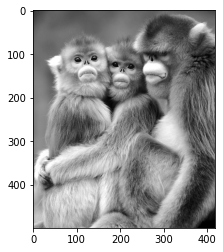

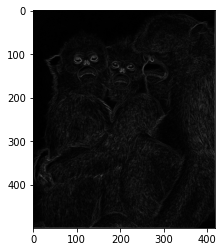

In [10]:
## Test 3.1 - Image derivatives in image space

monkey = read_image("external/monkey.jpg", 1)
display(monkey)
display(sol.conv_der(monkey))

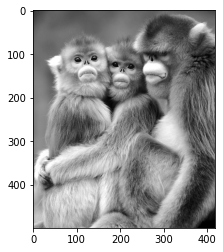

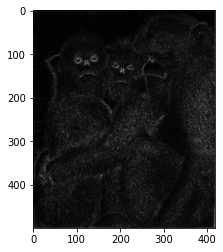

In [11]:
## Test 3.2 - Image derivatives in Fourier space

monkey = read_image("external/monkey.jpg", 1)
display(monkey)
display(sol.fourier_der(monkey))